<a href="https://colab.research.google.com/github/Jessekato/Econometrics/blob/main/Effect_of_an_Outlier_on_OLS_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

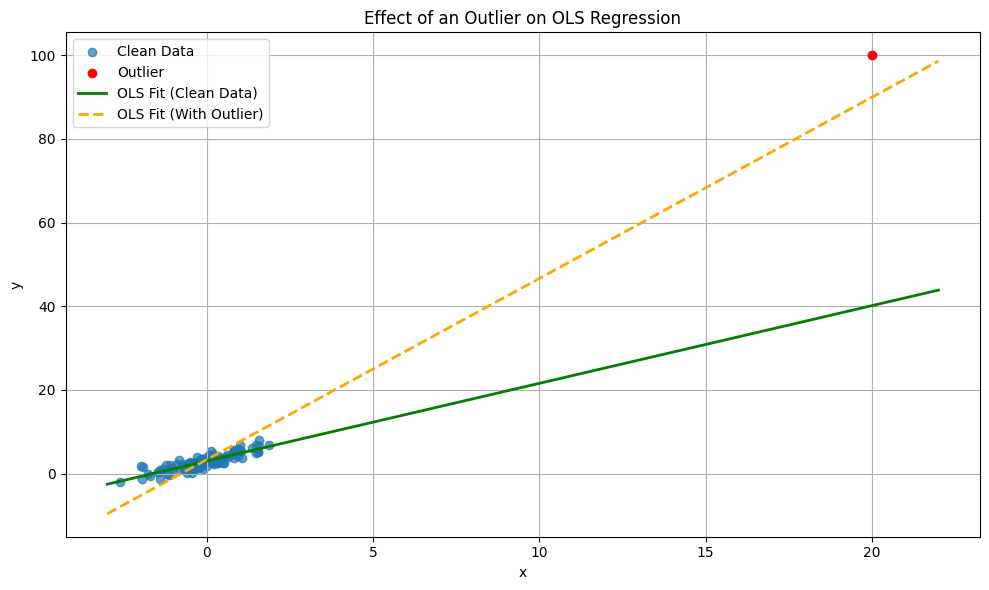

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                      y   R-squared:                       0.761
 Model:                            OLS   Adj. R-squared:                  0.759
 Method:                 Least Squares   F-statistic:                     312.2
 Date:                Sun, 15 Jun 2025   Prob (F-statistic):           3.14e-32
 Time:                        12:35:27   Log-Likelihood:                -135.71
 No. Observations:                 100   AIC:                             275.4
 Df Residuals:                      98   BIC:                             280.6
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Set seed for reproducibility
np.random.seed(42)

# Step 1: Generate clean data
n = 100
x = np.random.normal(0, 1, n)                     # Predictor variable
epsilon = np.random.normal(0, 1, n)               # Noise
y = 3 + 2 * x + epsilon                           # Linear relationship

# Step 2: Fit OLS model on clean data
X_clean = sm.add_constant(x)
model_clean = sm.OLS(y, X_clean).fit()

# Step 3: Add one outlier
x_outlier = np.append(x, 20)
y_outlier = np.append(y, 100)

# Step 4: Fit OLS model on data with outlier
X_outlier = sm.add_constant(x_outlier)
model_outlier = sm.OLS(y_outlier, X_outlier).fit()

# Step 5: Plot both models
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Clean Data', alpha=0.7)
plt.scatter(20, 100, color='red', label='Outlier', zorder=5)

x_range = np.linspace(-3, 22, 100)
X_range = sm.add_constant(x_range)
y_pred_clean = model_clean.predict(X_range)
y_pred_outlier = model_outlier.predict(X_range)

plt.plot(x_range, y_pred_clean, label='OLS Fit (Clean Data)', color='green', linewidth=2)
plt.plot(x_range, y_pred_outlier, label='OLS Fit (With Outlier)', color='orange', linestyle='--', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Effect of an Outlier on OLS Regression')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Output regression summaries
model_clean.summary(), model_outlier.summary()
